In [1]:
import numpy as np
import pandas as pd
import kagglehub
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [39]:
import tensorflow as tf  # Deep learning framework
from tensorflow import keras  # High-level API for building models
from tensorflow.keras import layers  # Neural network layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.metrics import AUC, Precision, Recall
from sklearn.model_selection import train_test_split  # Split data into train/test sets
from sklearn.preprocessing import StandardScaler  # Normalize features
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif # Import feature selection tools
from sklearn.svm import LinearSVC # Using LinearSVC for efficiency on large datasets
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression #LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, f1_score  # Evaluation metrics
pd.set_option('display.max_columns', None) # to display the total number columns present in the dataset

In [3]:
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\k\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [4]:
os.listdir(r"C:\Users\k\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3")

['creditcard.csv']

In [5]:
Data=pd.read_csv(os.path.join(path, "creditcard.csv"))

In [6]:
Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
Data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
Data.duplicated().sum()

np.int64(1081)

After Checking we see we Have Duplicated in our Datasets, so we will go ahead and remove them

In [9]:
#Dropping Duplicated 

Data.drop_duplicates(inplace=True)

Checkin Duplicates after removing

In [10]:
Data.duplicated().sum()

np.int64(0)

In [11]:
# Display columns names
Data.columns.to_list() 

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [12]:
# Get summary statistics for each column and transpose for better readability

Data.describe().transpose()  

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


In [13]:
# Count numerical columns (int, float types)
num_cols = Data.select_dtypes(include=['number']).shape[1] 

# Count categorical columns (object, category types)
cat_cols = Data.select_dtypes(include=['object', 'category']).shape[1] 

print(f"Numerical columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")

Numerical columns: 31
Categorical columns: 0


Numerical Features Only:

All features are numerical, making scaling straightforward (e.g., StandardScaler).

No categorical variables to encode.

<Axes: >

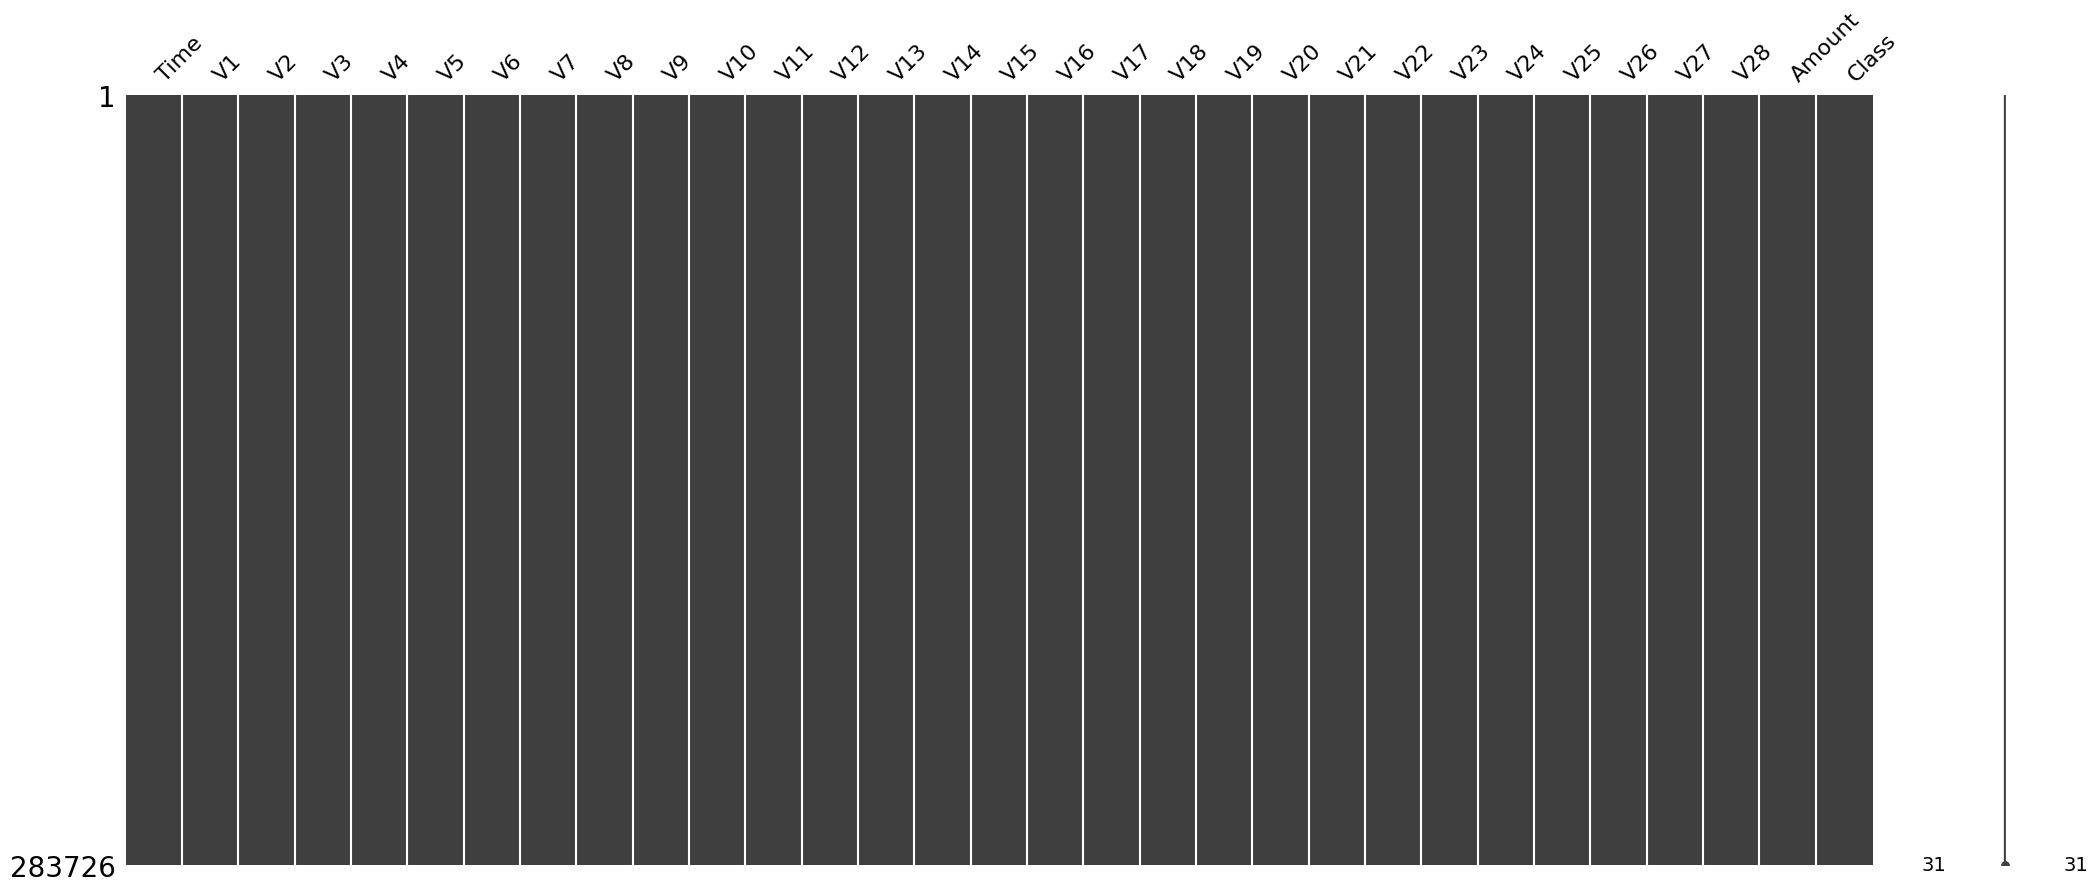

In [14]:
msno.matrix(Data)

No Missing Data:

The dataset contains no missing values, simplifying preprocessing.

In [15]:
Data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [16]:
# Calculate and print the percentage of non-fraudulent transactions

print('Non Fratulent', round(Data['Class'].value_counts()[0] / len(Data) * 100, 2), '% of the dataset')
print('Fratulent', round(Data['Class'].value_counts()[1] / len(Data) * 100, 2), '% of the dataset')

Non Fratulent 99.83 % of the dataset
Fratulent 0.17 % of the dataset


Highly Imbalanced Dataset: The target variable Class is heavily skewed:

Non-fraudulent transactions (Class = 0) make up ~99.83% Fraudulent transactions (Class = 1) make up only ~0.17%

This imbalance means models must be carefully trained to avoid bias towards the majority class.

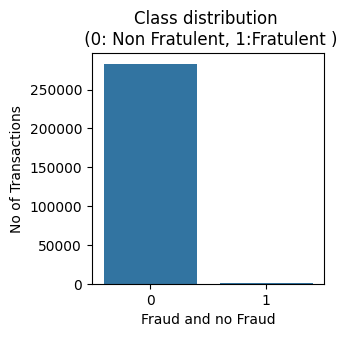

In [17]:
plt.figure(figsize=(3,3))

sns.countplot(x=Data['Class'])   #count plot for each class fraud and non_fraud
plt.title('Class distribution \n (0: Non Fratulent, 1:Fratulent )')
plt.xlabel('Fraud and no Fraud')
plt.ylabel('No of Transactions')
plt.show()

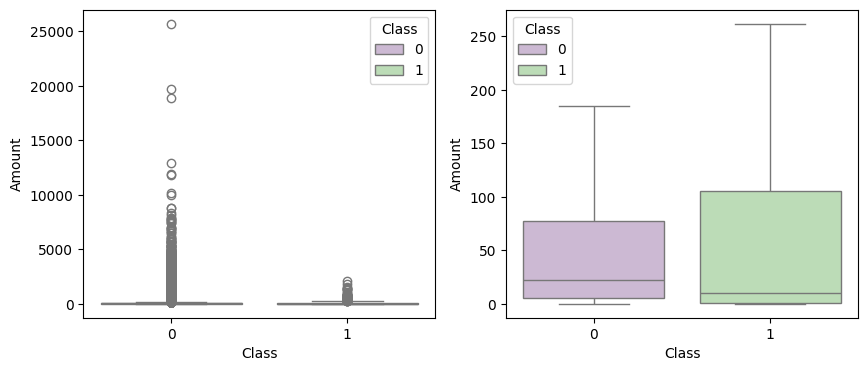

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=Data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=Data, palette="PRGn",showfliers=False)
plt.show()

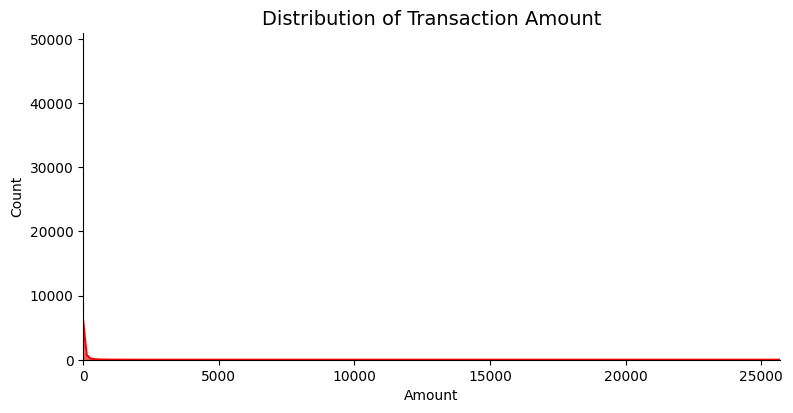

(0.0, 172792.0)

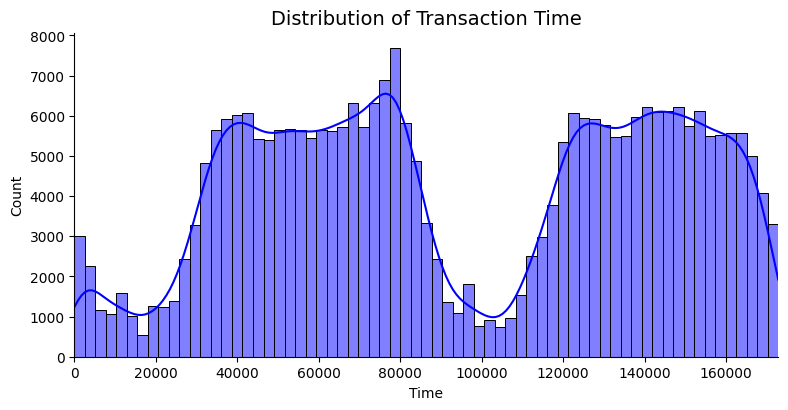

In [19]:
# Plot distribution of the 'Amount' feature with KDE and red color
sns.displot(Data['Amount'], color='r', kde=True, height=4, aspect=2)
plt.title('Distribution of Transaction Amount', fontsize=14)
plt.xlim([Data['Amount'].min(), Data['Amount'].max()])
plt.show()

# Plot distribution of the 'Time' feature with KDE and blue color
sns.displot(Data['Time'], color='b', kde=True, height=4, aspect=2)
plt.title('Distribution of Transaction Time', fontsize=14)
plt.xlim([Data['Time'].min(), Data['Time'].max()])

Feature Distributions:

Transaction Amount: Distribution is right-skewed — most transactions have low amounts, but a few are very large. This might help distinguish frauds, as frauds may cluster at different amount ranges.

Transaction Time: Spans a wide range; analyzing frauds by time (e.g., odd hours) could provide useful signals.

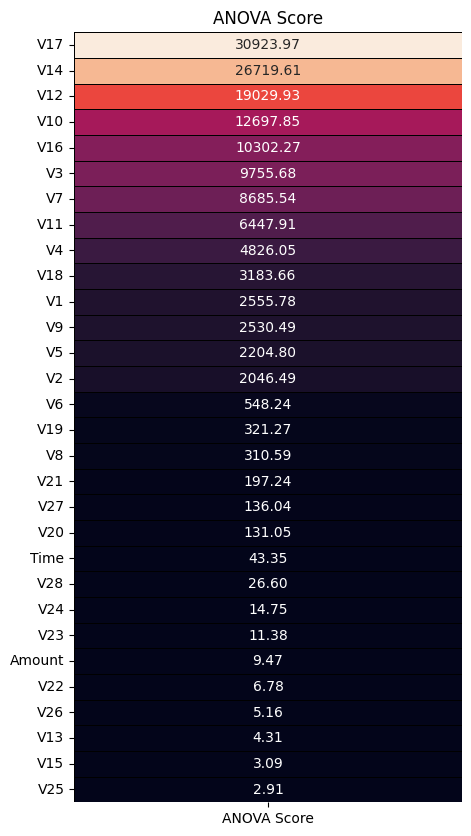

In [20]:
Features=Data.loc[:, :'Amount']   #select All columns from start to Amount as Features
Target=Data.loc[:, 'Class']    #selecting the Target column


best_features = SelectKBest(score_func=f_classif, k='all')  # Initialize ANOVA F-test with all features
fit = best_features.fit(Features, Target)  # Fit the model

# Create a DataFrame of feature scores
featureScores = pd.DataFrame(data=fit.scores_, index=list(Features.columns), columns=['ANOVA Score'])
featureScores = featureScores.sort_values(ascending=False, by='ANOVA Score')  # Sort by score descending


# Plot heatmap of ANOVA scores
plt.figure(figsize=(5, 10))
sns.heatmap(featureScores, annot=True, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('ANOVA Score');  # Set title

This plot displays a heatmap titled "ANOVA Score," which represents the results of an ANOVA (Analysis of Variance) statistical test applied as a feature selection technique. The table-like structure shows various features and their corresponding ANOVA scores, sorted in descending order of importance.

ANOVA as a Feature Selection Method: The code explicitly states that ANOVA (specifically, f_classif for classification tasks) is used to calculate the variance between groups (e.g., fraudulent vs. non-fraudulent transactions) for each feature. A higher ANOVA score indicates that the feature is more effective at discriminating between the classes.

Feature Ranking:

Top Features: 'V17' has the highest ANOVA score of 33979.17, followed by 'V14' (28695.55), 'V12' (20749.82), 'V10' (14057.98), and 'V16' (11443.35). These features exhibit the largest differences in means across the target classes, suggesting they are highly relevant for predicting credit card fraud. The warmer colors (light orange to deep red) visually emphasize their high scores.

Mid-Range Features: Features like 'V3', 'V7', 'V11', 'V4', and 'V18' also show substantial ANOVA scores, indicating their importance.

Least Important Features: Towards the bottom, features such as 'V22' (0.18), 'V23' (2.05), 'V25' (3.12), 'V26' (5.08), 'V13' (5.95), and 'Amount' (9.03) have very low ANOVA scores. This implies that their means are not significantly different across the fraud and non-fraud classes, making them less impactful for distinguishing between them.

Comparison with Random Forest Importance (if available): It's interesting to note the different rankings compared to a Random Forest feature importance chart (if you have one). While some top features might overlap (e.g., V14, V17), the relative importance can differ as ANOVA is a univariate statistical test, while Random Forest considers interactions between features.

Insights from 'Time' and 'Amount': Similar to the Random Forest feature importance, the 'Time' and 'Amount' features have relatively low ANOVA scores (43.25 and 9.03, respectively). This reinforces the idea that, in this dataset, the anonymized 'V' features are far more discriminative for fraud detection.

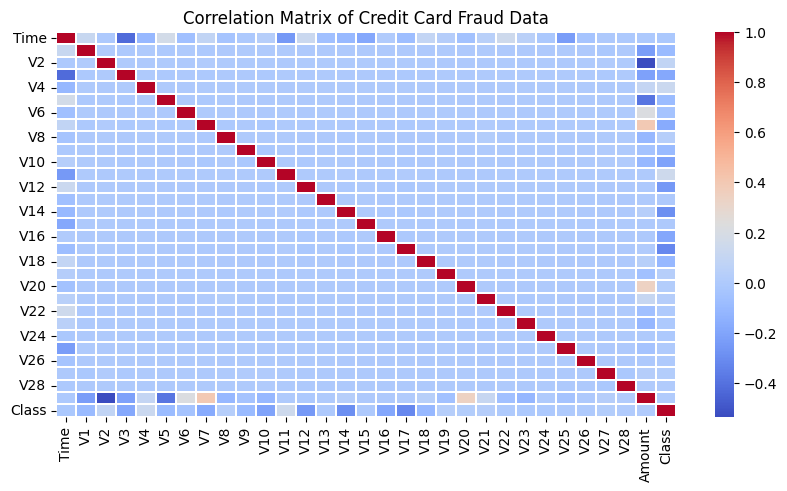

In [21]:
#Calculate the correlation Matrix

corr_matrix=Data.corr()

plt.figure(figsize=(10,5))

#Heatmap of correlation matrix

sns.heatmap(corr_matrix,
            annot=False,
            cmap='coolwarm',
            linewidth=0.3,
            linecolor='white')

plt.title('Correlation Matrix of Credit Card Fraud Data')
plt.show()

Preprocessing

Dataset Splitting:

In [22]:
X=Data.drop('Class', axis=1)    # Drop the target column 'Class' to create the feature matrix X
y=Data['Class']  # Assign the target column 'Class' to the variable y (labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Split data into training and testing sets


# Print the shape (rows, columns) of the training and test feature sets
print(f"\nTraining set shape: {X_train.shape}, Test set shape: {X_test.shape}")
# Print the normalized distribution (as percentages) of the target classes in the training set
print(f"Training target distribution:\n{y_train.value_counts(normalize=True)}")
# Print the normalized distribution (as percentages) of the target classes in the test set
print(f"Test target distribution:\n{y_test.value_counts(normalize=True)}")


Training set shape: (226980, 30), Test set shape: (56746, 30)
Training target distribution:
Class
0    0.998335
1    0.001665
Name: proportion, dtype: float64
Test target distribution:
Class
0    0.998326
1    0.001674
Name: proportion, dtype: float64


In [23]:
scaler=StandardScaler()
# Initialize StandardScaler to standardize features by removing the mean and scaling to unit variance

# Fit the scaler on 'Time' and 'Amount' columns of the training set and transform them
X_train[['Amount', 'Time']]= scaler.fit_transform(X_train[['Amount','Time']])

# Use the same scaler parameters to transform 'Time' and 'Amount' columns in the test set
X_test[['Amount','Time']]=scaler.transform(X_test[['Amount', 'Time']])

Handle Class Imbalance:

In [25]:
smote = SMOTE(random_state=42)  # Initialize SMOTE to handle class imbalance by generating synthetic minority samples

#applying SMOTE on Training Data to resample and balance the class

X_train_resample, y_train_resample=smote.fit_resample(X_train, y_train)

#print resample Data shape
print(f"Resampled Training set shape: {X_train_resample.shape}")

# Print the class distribution after resampling (should be balanced)
print(f"Resampled Training class distribution:\n {y_train_resample.value_counts(normalize=True)} ")


Resampled Training set shape: (453204, 30)
Resampled Training class distribution:
 Class
0    0.5
1    0.5
Name: proportion, dtype: float64 


Model LogisticRegression


Accuracy (Lr): 0.9737

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746



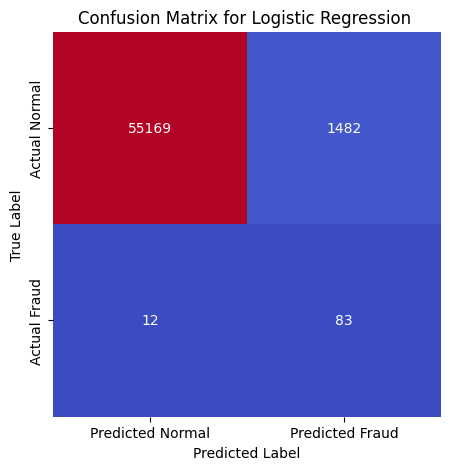

In [38]:
Model=LogisticRegression()
Model.fit(X_train_resample, y_train_resample)

# Evaluate the Model
y_pred=Model.predict(X_test)


#accuracy socre
accuracy_Lr = accuracy_score(y_test, y_pred)
print(f"Accuracy (Lr): {accuracy_Lr:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm=confusion_matrix(y_test, y_pred)

#plotting confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d',cmap='coolwarm',cbar=False,
            xticklabels=['Predicted Normal','Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.title('Confusion Matrix for Logistic Regression ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Model XBBoost Classifier


Accuracy (XGB): 0.9993

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.81      0.80      0.80        95

    accuracy                           1.00     56746
   macro avg       0.90      0.90      0.90     56746
weighted avg       1.00      1.00      1.00     56746



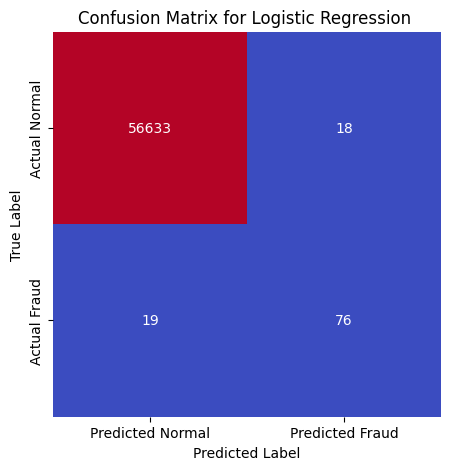

In [41]:
XGB_Model= XGBClassifier(n_estimators=200, random_state=42)
XGB_Model.fit(X_train_resample, y_train_resample)     

# Evaluate the Model
XGB_y_pred=XGB_Model.predict(X_test)


#accuracy socre
accuracy_XGB = accuracy_score(y_test, XGB_y_pred)
print(f"Accuracy (XGB): {accuracy_XGB:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, XGB_y_pred))

cm=confusion_matrix(y_test, XGB_y_pred)

#plotting confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d',cmap='coolwarm',cbar=False,
            xticklabels=['Predicted Normal','Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.title('Confusion Matrix for Logistic Regression ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

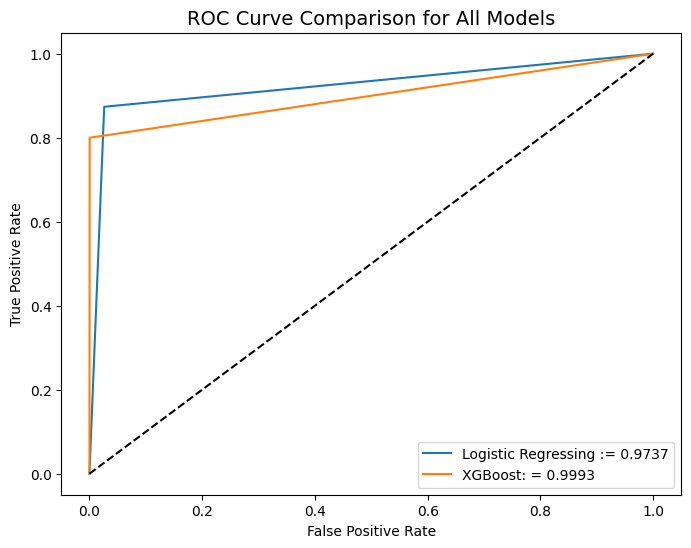

In [46]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, XGB_y_pred)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regressing := {accuracy_Lr:.4f}')
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost: = {accuracy_XGB:.4f}")
plt.plot([0,1],[0,1],'k--')  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve Comparison for All Models', fontsize=14)
plt.legend()
plt.show()


In [47]:
# Create your model metrics (replace with your actual metrics if you have cross-validation means)

model_names = ['Logistic Regression', 'XB Boost Classifier']
accuracy=[accuracy_Lr, accuracy_XGB]

#Build comparision DataFrame
compare = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy})
compare

,Model,Accuracy
0,Logistic Regression,0.973672
1,XB Boost Classifier,0.999348
